In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns



Use the import cell that is convenient for you. Just remember to save the data in a pandas dataframe called "data"

In [24]:
"""
# This is Paul's local import
data = pd.read_csv("./data-input/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data.head()
"""

'\n# This is Paul\'s local import\ndata = pd.read_csv("./data-input/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")\ndata.head()\n'

In [31]:

# This is Pedro's local import
from pathlib import Path

# Get the current working directory
current_dir = Path.cwd()

# Construct the full path
data_path = (current_dir / '..' / 'data' / 'data.csv').resolve()
data = pd.read_csv(data_path)


In [32]:
"""
# This is google.colab import
# from google.colab import drive
# drive.mount('/content/drive')

import gdown

# File ID from the Google Drive shareable link
file_id = '1pexbKsezfklXDaF6sI_YhTU8fSJAIgpP'
# URL to be used with gdown
gdown_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(gdown_url, 'data.csv', quiet=False)

# Read the CSV file into a DataFrame
data = pd.read_csv('data.csv')
data.head()
"""

"\n# This is google.colab import\n# from google.colab import drive\n# drive.mount('/content/drive')\n\nimport gdown\n\n# File ID from the Google Drive shareable link\nfile_id = '1pexbKsezfklXDaF6sI_YhTU8fSJAIgpP'\n# URL to be used with gdown\ngdown_url = f'https://drive.google.com/uc?id={file_id}'\n\n# Download the file\ngdown.download(gdown_url, 'data.csv', quiet=False)\n\n# Read the CSV file into a DataFrame\ndata = pd.read_csv('data.csv')\ndata.head()\n"

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [34]:
# Get unique values
unique_values = data['primaryCategories'].unique()

print(unique_values)

['Health & Beauty' 'Electronics' 'Office Supplies'
 'Animals & Pet Supplies' 'Home & Garden' 'Electronics,Furniture'
 'Toys & Games,Electronics' 'Electronics,Media'
 'Office Supplies,Electronics']


In [35]:
data = data[["dateAdded", "primaryCategories", "reviews.username", "brand", "reviews.text", "reviews.title", "reviews.rating"]]

data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


In [36]:
# Concatenate
data['reviews.text'] = data['reviews.text'] + ' ' + data['reviews.title']

data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


In [37]:
data = pd.DataFrame(data)

# Convert the 'dateAdded' column to datetime format
data['dateAdded'] = pd.to_datetime(data['dateAdded'])

# Extract the year and create a new column 'year'
data['year'] = data['dateAdded'].dt.year

# Drop column
data.drop(['dateAdded'], axis=1, inplace=True)

# Display the resulting DataFrame
data.head()


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015


In [38]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

primaryCategories    0
reviews.username     5
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
year                 0
dtype: int64


In [39]:
# Remove rows where 'reviews.username' is empty
data = data.dropna(subset=['reviews.username'])

# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

print (missing_values)
data.head()

primaryCategories    0
reviews.username     0
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
year                 0
dtype: int64


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015


In [40]:
# Get the value counts for the 'reviews.rating' column
rating_counts = data['reviews.rating'].value_counts()
print(rating_counts)

reviews.rating
5    19893
4     5648
3     1206
1      965
2      615
Name: count, dtype: int64


In [41]:
# Function to determine negative, neutral and positive
def review_sentiment(rating):
    if rating in [1, 2]:
        return "negative"
    elif rating in [3]:
        return "neutral" 
    elif rating in [4, 5]:
        return "positive"
    else:
        return None

In [42]:
# Apply the reviews rating
data['sentiment'] = data['reviews.rating'].apply(review_sentiment)
data.head()

,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year,sentiment
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015,neutral
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015,positive
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015,positive
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015,positive
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015,positive


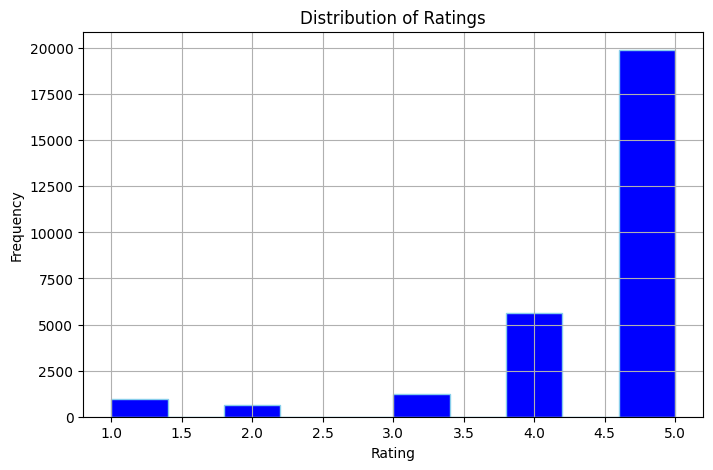

In [43]:
# Plot
plt.figure(figsize=(8, 5))
plt.hist(data['reviews.rating'], bins=10, range=(1, 5), color='blue', edgecolor='skyblue')  # Adjust bins and range as needed
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.grid(True)
plt.show()

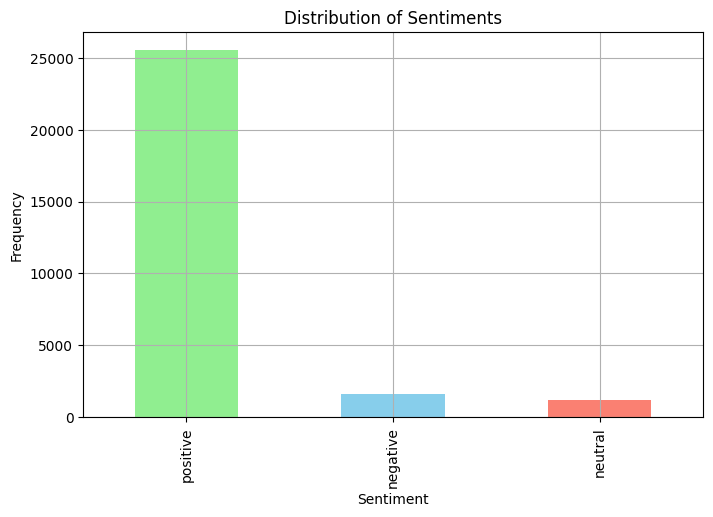

In [49]:
sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['lightgreen', 'skyblue', 'salmon'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments')
plt.grid(True)
plt.show()

In [53]:
# Optionally we can now drop the reviews rating column, if we are just going to use sentiment.
data.drop(['reviews.rating'], axis=1, inplace=True)
data.head()

,primaryCategories,reviews.username,brand,reviews.text,reviews.title,year,sentiment
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,2015,neutral
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,2015,positive
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,2015,positive
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,2015,positive
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,2015,positive


Unique characters in the text data:
{';', ':', '+', 'F', '√', 'q', 'º', '%', 'V', '$', 'C', 't', 'ì', '|', 'N', 'n', 'R', '¬', 'L', '@', 'è', 'x', '{', '/', 'Y', '=', 'h', 'ú', 'w', '5', 'Ä', 'G', 'S', '∞', '2', 'M', '.', '4', 'g', ')', 'P', '8', '3', 'z', '∫', '†', 'a', 'B', 'W', 'l', 'j', '1', '§', '!', 'A', 'r', '"', '&', '*', 'J', 'p', '©', 'T', 'O', '0', 'I', 'ô', '6', 'Z', 'X', 'Å', 'i', '-', 'U', 'm', '9', '7', ' ', 'u', '¶', 'k', 'ã', 'ƒ', 'Ô', 'd', '#', '≤', 'ò', 'ù', '‚', 'c', 'D', '?', '<', '>', 'v', 'o', 'K', "'", 'Q', 's', '_', 'E', 'b', '(', 'y', 'e', 'H', ',', '∏', 'f', '`'}
Character counts in the text data:
Counter({' ': 838585, 'e': 439312, 't': 341147, 'a': 296824, 'o': 259216, 'r': 224468, 's': 216239, 'i': 211810, 'n': 186822, 'h': 153679, 'l': 145094, 'd': 135131, 'u': 90826, 'c': 84071, 'y': 80894, 'g': 76912, 'm': 75288, 'b': 69181, 'f': 68086, 'p': 66405, '.': 65091, 'w': 54270, 'v': 44659, 'k': 33357, 'I': 29888, ',': 19246, 'T': 16693, 'G': 15901, 'A': 13910,

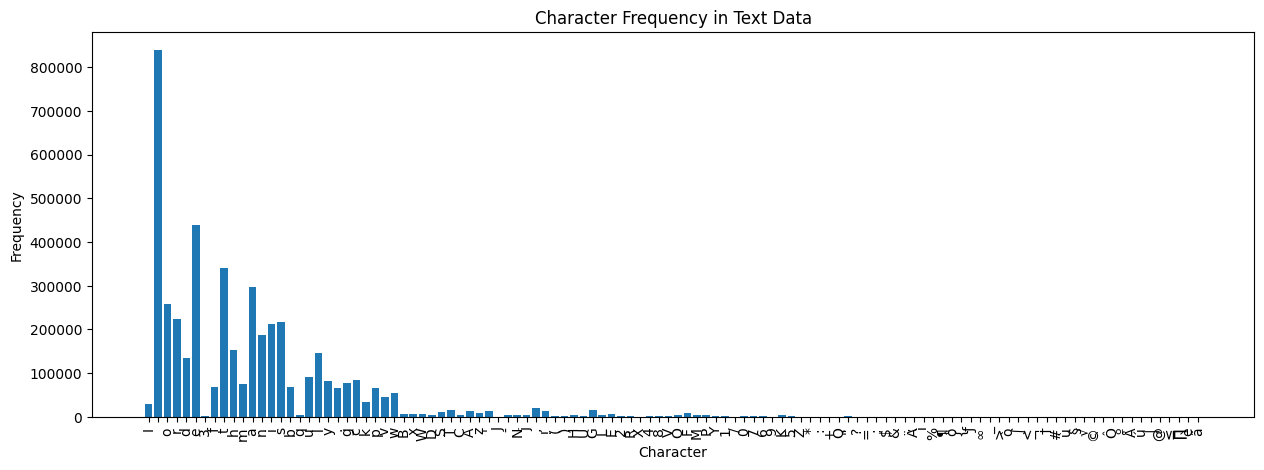

                                        reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                cleaned_reviews.text  
0  I order 3 of them and one of the item is bad q...  
1  Bulk is always the less expensive way to go fo...  
2  Well they are not Duracell but for the price i...  
3  Seem to work as well as name brand batteries a...  
4  These batteries are very long lasting the pric...  


In [64]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Define a function to find unique characters in the text
def find_unique_characters(text_series):
    all_text = ' '.join(text_series)
    unique_characters = set(all_text)
    return unique_characters

# Define a function to count the occurrences of each character
def count_characters(text_series):
    all_text = ' '.join(text_series)
    character_counts = Counter(all_text)
    return character_counts

# Find unique characters in the 'reviews.text' column
unique_characters = find_unique_characters(data['reviews.text'])
print("Unique characters in the text data:")
print(unique_characters)

# Count the occurrences of each character
character_counts = count_characters(data['reviews.text'])
print("Character counts in the text data:")
print(character_counts)

# Plot the character counts
plt.figure(figsize=(15, 5))
plt.bar(character_counts.keys(), character_counts.values())
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.title('Character Frequency in Text Data')
plt.xticks(rotation=90)
plt.show()

# Define a function to clean unusual characters
def clean_weird_characters(text):
    # Example: Remove non-ASCII characters
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Apply the function to clean the text data
data['cleaned_reviews.text'] = data['reviews.text'].apply(clean_weird_characters)

# Display the resulting DataFrame after cleaning
print(data[['reviews.text', 'cleaned_reviews.text']].head())

In [65]:
text = re.sub(r'[\u00BA\u00C4\u00C5\u00D4\u00E3\u00E8\u00EC\u00F2\u00F4\u00F9\u00FA\u0192]+', '', text)

NameError: name 'text' is not defined